Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Основные статистические тесты и проверка гипотез.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

# Генеральная совокупность и выборка

Генеральная совокупность - совокупность всех объектов (единиц), относительно которых учёный намерен делать выводы при изучении конкретной проблемы.

Выборка - множество случаев (испытуемых, объектов, событий, образцов), с помощью определённой процедуры выбранных из генеральной совокупности для участия в исследовании.

# Датасет людей с болезнями сердца


Загрузим новый датасет, для предсказания болезни человека (сердечная болезнь) - https://www.kaggle.com/ronitf/heart-disease-uci.

Колонки:

* age
* sex
* cp chest pain type (4 values)
* trestbps resting blood pressure
* chol serum cholestoral in mg/dl
* fbs fasting blood sugar > 120 mg/dl
* restecg resting electrocardiographic results (values 0,1,2)
* thalach maximum heart rate achieved
* exang exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest. A test that indicates a high probability of coronary artery disease is one in which there is substantial ST depression at low work rate associated with typical angina-like pain and a drop in blood pressure. Deeper and more widespread ST depression generally indicates more severe or extensive disease.
* the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - ill or not => target == 0 means that there is significant heart disease. A 1 means that there is not.

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/heart.csv"
data=pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
len(data)

303

Возьмем две колонки из генеральной совокупности:

**trestbps** - давление в спокойном состоянии

**chol** - уровень холестирина

Построим точечный график этих параметров.

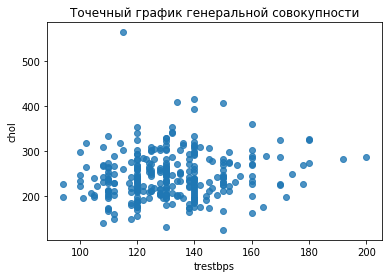

In [4]:
trestbps = data['trestbps']
chol = data['chol']
sns.regplot(x= trestbps, y=chol,data=data, fit_reg=False)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Точечный график генеральной совокупности')
plt.show()

**Генеральная совокупность** в данном случае - все пациенты. Их количество - 303.

**Пример презентативной выборки**

Возьмем некую выборку из генеральной совокупности, например, людей, возраст которых меньше 45 лет, и построим точечный график для данной выборки.


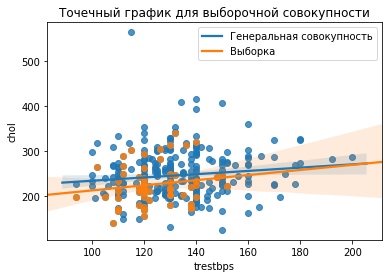

In [5]:
trestbps_small = data[data['age']<45]['trestbps']
chol_small = data[data['age']<45]['chol']
sns.regplot(x= trestbps, y=chol,data=data, fit_reg=True)
sns.regplot(x= trestbps_small, y=chol_small,data=data, fit_reg=True)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

In [6]:
len(data[data['age']<45])

56

По графику можно заметить, что если мы будем рассматривать выборку людей меньше 45 лет, то статистические формулы о генеральной совокупности будут верны, так как выборка более-менее презентативна.

Проблема в том, **как** доказать, что выборка является достаточно репрезентативной, и что эта анализ этой выборки позволит сделать выводы о генеральной совокупности. 

**Пример непрезентативной выборки**

Возьмем выборку людей, возраст которых меньше 40 лет. Посмотрим точечный график двух параметров: **thalach** - максимальный пульс и **trestbps** - показатель давления в спокойном положении. По графику можно сделать вывод, что эти параметры имеют линейную зависимость.

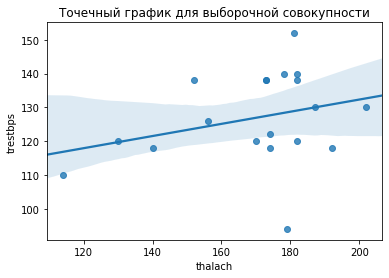

In [7]:
thalach_small = data[data['age']<=40]['thalach']
trestbps_small = data[data['age']<=40]['trestbps']
sns.regplot(x= thalach_small, y=trestbps_small,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.title('Точечный график для выборочной совокупности')
plt.show()

В генеральной совокупности можно увидеть, что этой зависимости нет.

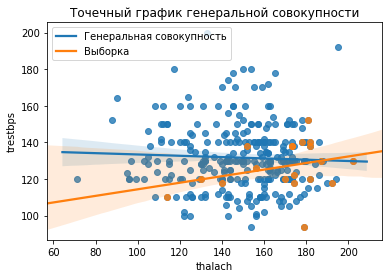

In [8]:
thalach = data['thalach']
trestbps = data['trestbps']
sns.regplot(x= thalach, y=trestbps,data=data, fit_reg=True)
sns.regplot(x= thalach_small, y=trestbps_small,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график генеральной совокупности')
plt.show()

Данная выборка является непрезентативной.

# Доверительный интервал

Посчитаем доверительный интервал для параметра trestbps и chol.

Среднее значение:

In [9]:
mean_val = statistics.mean(trestbps)
print(mean_val)

131.62376237623764


Стандартное отклонение:

In [10]:
st_deviation = statistics.pstdev(trestbps)
print(st_deviation)

17.509178065734393


Частотный график выборки:

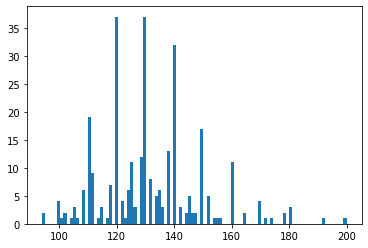

In [11]:
plt.hist(trestbps, 100)
plt.show()

Посчитаем процент элементов, лежащий за пределами доверительного интервала.

In [12]:
len(trestbps[(trestbps>=mean_val-2*st_deviation) & (trestbps<=mean_val + 2*st_deviation)])/len(trestbps)

0.9504950495049505

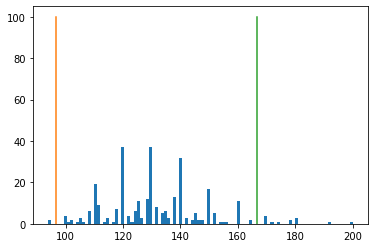

In [18]:
plt.hist(trestbps, 100)
plt.plot([mean_val-2*st_deviation, mean_val-2*st_deviation], [0, 100])
plt.plot([mean_val+2*st_deviation, mean_val+2*st_deviation], [0, 100])

95% выборки находится в пределах доверительного интервала.

# Квантили

Посчитаем 10-типроцентный квантиль для всех атрибутов

In [19]:
data.quantile(.1)

age          42.0
sex           0.0
cp            0.0
trestbps    110.0
chol        188.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.1, dtype: float64

Посчитаем 30-типроцентный квантиль для атрибута trestbps

In [20]:
quantille_30 = trestbps.quantile(.3)
print(quantille_30)

120.0


Докажем, что 120 - это 30типроцентный квантиль:

In [21]:
len(trestbps[trestbps<=quantille_30])/len(trestbps)

0.3201320132013201

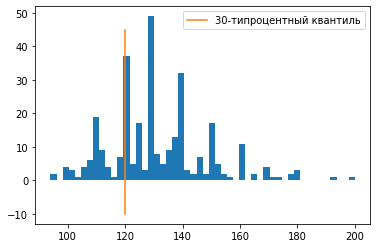

In [22]:
plt.hist(trestbps, 50)
plt.plot([120, 120], [-10, 45])
plt.legend(['30-типроцентный квантиль'])
plt.show()

# Квартили

In [62]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


25%, 50%, 75% - соответствующие квартили (1ый, второй, третий).

Еще один метод:

In [23]:
data.trestbps.quantile([0.25,0.5,0.75])

0.25    120.0
0.50    130.0
0.75    140.0
Name: trestbps, dtype: float64

# Проверка статистических гипотез

**Критерии значимости** показывают показателем того, что препарат действительно работает или что значения случайны.

# Пример 1. Автобус со спящими пассажирами

В городе проходят 2 конференции: математиков и баскетболистов. Едет автобус со спящими пассажирами, которых нельзя будить, но известен их рост. Как понять, является ли пассажир футболистом или математиком?

Средний рост баскетболиста: 185-195 см

Средний рост человека: по данным всемирного сообщества учёных-медиков «NCD Risk Factor Collaboration» (NCD-RisC), средний рост российских женщин на 2014 год — 165,3 см, мужчин — 176,5 см

**Решение**: расстояние до среднего роста двух выборок (баскетболистов и математиков) с большой степенью вероятности будет свидетельствовать о том, к какой выборке относится тот или иной пассажир. Следовательно, две выборки имеют статистическое различие в росте.

# Алгоритм проверки статистических гипотез

*   формулируется **основная гипотеза H0** и **альтернативная гипотеза H1**;
*   выбирается статистический критерий, с помощью которого будет проверяться гипотеза;
*   задаётся значение уровня значимости α;
*   находятся границы области принятия гипотезы;
*   делается вывод о принятии или отвержении основной гипотезы H0.

# P-value или статистическая значимость

P-значение, или значение вероятности, это статистическая величина, выраженная числом от 0 до 1, которая используется для проверки гипотезы. В клинических испытаниях данная величина применяется для определения, является ли полученный в клинических испытаниях результат случайным.

До начала сбора данных необходимо определить уровень значимости, который обычно равен 5 % (или 0,05), хотя в зависимости от исследования может быть выбран и другой показатель.

**Статистически значимым** (и позволяющим отвергнуть нулевую гипотезу)при этом считается результат, р-значение которого равно уровню значимости или меньше его. Это, как правило, обозначается следующим образом: p ≤ 0,05.

 При **небольшом p-значении** маловероятна случайность результатов, что дает основание **отвергнуть нулевую гипотезу**. При **большом p-значении** наблюдаемая разница может быть результатом случайности, и **предположение о нулевой гипотезе не может быть отвергнуто**.

# Тесты на нормальность

**Тест Шапиро-Вилка** проверяет, имеет ли выборка данных распределение Гаусса: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

*  Гипотеза H0 - образец имеет нормальное гауссово распределение
*  гипотеза H1 - образец не имеет нормальное распределение

```
p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
```

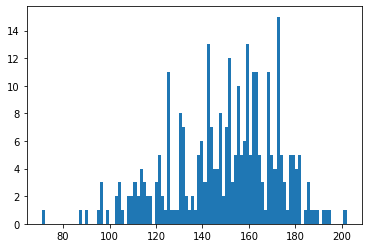

In [30]:
plt.hist(data['thalach'], 100)
plt.show()

In [66]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(data['thalach'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.976, p=0.000
Probably not Gaussian


```
W: float
The test statistic.

p-value: float
The p-value for the hypothesis test.

 For N > 5000 the W test statistic is accurate but the p-value may not be.
```

Действительно, непохоже на нормальное.

In [34]:
from scipy.stats import shapiro
mu, sigma = 11001, 200 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

stat, p = shapiro(s)
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.999, p=0.614
Probably Gaussian


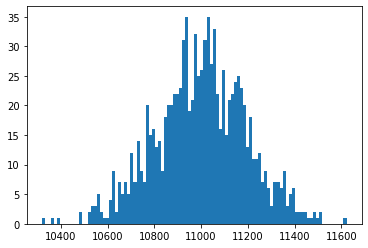

In [36]:
plt.hist(s, 100)
plt.show()

# Тест д'Агостино K ^ 2

Проверяет, является ли выборка нормальной. 

* гипотеза H0 - выборка является нормальной
* гипотеза H1 - выборка не является нормальной

In [39]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(s)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=1.834, p=0.400
Probably Gaussian


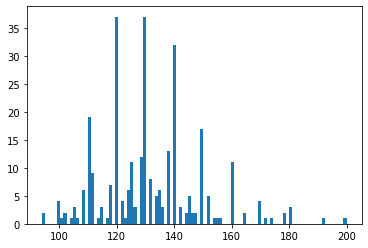

In [38]:
plt.hist( data['trestbps'], 100)
plt.show()

Действительно, похоже на нормальное.

# Тест Андерсона-Дарлинга

Проверяет, является ли выборка нормальной. 

* гипотеза H0 - выборка является нормальной
* гипотеза H1 - выборка не является нормальной

In [40]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(data['age'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the alpha level = %.1f%%' % (sl))
    else:
        print('Probably not Gaussian at the alpha level = %.1f%%' % (sl))

stat=1.514
Probably not Gaussian at the alpha level = 15.0%
Probably not Gaussian at the alpha level = 10.0%
Probably not Gaussian at the alpha level = 5.0%
Probably not Gaussian at the alpha level = 2.5%
Probably not Gaussian at the alpha level = 1.0%


```
Parameters:
___________________________________________
x: array_like
Array of sample data.

dist{‘norm’,’expon’,’logistic’,’gumbel’,’gumbel_l’, gumbel_r’,
‘extreme1’}, optional the type of distribution to test against. The default is ‘norm’ and ‘extreme1’, ‘gumbel_l’ and ‘gumbel’ are synonyms.

Returns:
___________________________________________
statistic: float
The Anderson-Darling test statistic.

critical_values: list
The critical values for this distribution.

significance_level: list
The significance levels for the corresponding critical values in percents. The function returns critical values for a differing set of significance levels depending on the distribution that is being tested against.
```

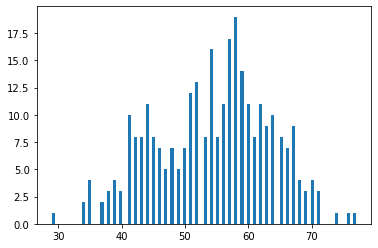

In [42]:
plt.hist(data['age'], 100)
plt.show()

Датасет о атмосферном давлении с 1986 года в городе Базель (Швейцария)

In [58]:
url="http://yustiks.ru/dataset/history2.csv"
df=pd.read_csv(url)
df['MSL'] = df['Mean Sea Level Pressure daily mean [MSL]']
df.head()

,Year,Month,Day,Hour,Minute,Mean Sea Level Pressure daily mean [MSL],Mean Sea Level Pressure daily max [MSL],Mean Sea Level Pressure daily min [MSL],MSL
0,1985,1,1,0,0,1012.84,1028.2,1005.3,1012.84
1,1985,1,2,0,0,1007.37,1010.5,1005.3,1007.37
2,1985,1,3,0,0,1012.52,1013.8,1010.9,1012.52
3,1985,1,4,0,0,1007.45,1012.3,1002.2,1007.45
4,1985,1,5,0,0,1012.58,1014.6,1011.1,1012.58


In [59]:
len(df)

12784

In [60]:
result = anderson(df['MSL'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the alpha level = %.1f%%' % (sl))
    else:
        print('Probably not Gaussian at the alpha level = %.1f%%' % (sl))

stat=24.110
Probably not Gaussian at the alpha level = 15.0%
Probably not Gaussian at the alpha level = 10.0%
Probably not Gaussian at the alpha level = 5.0%
Probably not Gaussian at the alpha level = 2.5%
Probably not Gaussian at the alpha level = 1.0%


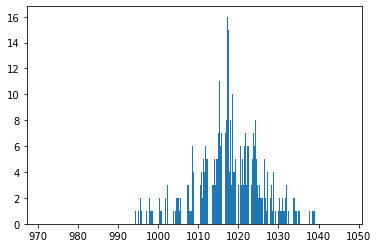

In [88]:
plt.hist(df['MSL'], 10000)
plt.show()

Сгенерируем распределение Гаусса

In [85]:
mu, sigma = 11001, 200 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

result = anderson(s)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the alpha level = %.1f%%' % (sl))
    else:
        print('Probably not Gaussian at the alpha level = %.1f%%' % (sl))

stat=0.475
Probably Gaussian at the alpha level = 15.0%
Probably Gaussian at the alpha level = 10.0%
Probably Gaussian at the alpha level = 5.0%
Probably Gaussian at the alpha level = 2.5%
Probably Gaussian at the alpha level = 1.0%


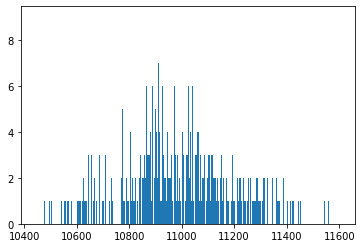

In [86]:
plt.hist(s, 1000)
plt.show()

# Корреляционные тесты

В этом разделе перечислены статистические тесты, которые вы можете использовать, чтобы проверить, **связаны ли две выборки** - имеют ли данные выборки зависимость.

Коэффициент корреляции Пирсона

```
Проверяет, имеют ли два образца линейную связь.

H0: два образца независимы
H1: существует зависимость между образцами.
```

In [50]:
from scipy.stats import pearsonr
pearsonr(trestbps, chol)

(0.12317420653239076, 0.032082053610872296)

```
Returns
r: float
Pearson’s correlation coefficient.

p-value: float
Two-tailed p-value.
```

The p-value roughly indicates the probability of an uncorrelated system
 producing datasets that have a Pearson correlation at least as extreme
 as the one computed from these datasets. The p-values are not entirely
 reliable but are probably reasonable for datasets larger than 500 or so

The p-value represents a test of the null hypothesis that x and y are uncorrelated, i.e. that the true population correlation coefficient is zero. Sample correlation coefficients close to zero (i.e. weak correlation) will therefore tend to give you large p-values, and coefficients close to 1 or -1 (i.e. strong positive/negative correlation) will give small p-values.

# Ранговая корреляция Спирмена

Проверяет, имеют ли два образца монотонные отношения.

*  H0: два образца независимы
*  H1: существует зависимость между образцами.

In [51]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr

stat, p = spearmanr(data['chol'], data['thalach'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.047, p=0.417
Probably independent


# Ранговая корреляция Кендалла

Уровень холестерин имеет зависимость с уровнем давления в состоянии покоя

In [52]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
stat, p = kendalltau(data['trestbps'], data['chol'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.086, p=0.029
Probably dependent


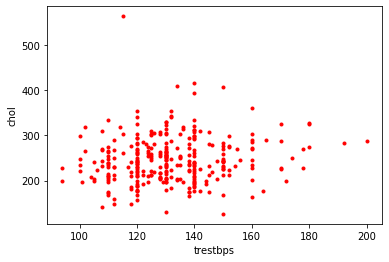

In [53]:
plt.plot(data['trestbps'], data['chol'], 'r.')
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

# Тесты на проверку стационарность временного ряда

В зависимости от наличия основной тенденции выделяют стационарные ряды, в которых среднее значение и дисперсия постоянны, и нестационарные, содержащие основную тенденцию развития - https://ru.wikipedia.org/wiki/Временной_ряд.

# Augmented Dickey-Fuller Unit Root Test

 (данные упорядочены)

*   Гипотеза H0 - временной ряд нестационарный
*   Гипотеза H1 - временной ряд стационарный

 Стационарн в.р. – отражение некоторого случайного процесса, сам процесс – в равновесии относительно некоего постоянного среднего уровня, его характеристики не зависят от момента времени. Стационарный процесс свободен от периодичности. В анализе временных рядов стационарные ряды **имеют постоянные по времени среднее, дисперсию и автокорреляции (т.е. сезонные зависимости удаляются с помощью разностей).**

In [1]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
time_series_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(time_series_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.992, p=0.994
Probably not Stationary


# Kwiatkowski-Phillips-Schmidt-Shin

(данные упорядочены)

*    Гипотеза H0 - временной ряд нестационарный
*    Гипотеза H1 - временной ряд стационарный

In [55]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
time_series_data = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
stat, p, lags, crit = kpss(time_series_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.500, p=0.042
Probably Stationary


/home/orange/venv/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


# **AB - тестирование**

# Проверка гипотезы t-критерия Стьюдента

Рассмотрим две выборки $X$ и $Y$, и мы хотим сравнить их средние значения $\mu_x$ и $\mu_y$

Тогда рассматривается нулевая гипотеза о том, что выборочные средние значения равны:
$$
H_0: \mu_x = \mu_y
$$
и альтернативная о том, что выборочные средние не равны:

$$
H_1: \mu_x \ne \mu_y.
$$

 Тест измеряет насколько среднеквадратичное значение меняется среди выборок. Если мы получаем высокое p-value, например, выше 0.05 или 0.1, тогда мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны. Если p-value меньше, чем 1% (или 5%), то мы отвергаем нулевую гипотезу.

# Одновыборочный t-критерий

T-test используют для определения, насколько среднее исследуемой выборки статистически отличается от среднего значения генеральной совокупности. Применяется для проверки гипотезы о равенстве математического ожидания некоторому известному значению. Вычисляется по формуле.

$$t = \frac{\overline X - m}{s_X / \sqrt{n}}$$

Где ${\overline X}$ - выборочное среднее, m - среднее совокупности, ${S_{X}}$ - выборочная дисперсия.

Возьмем выборку женщин по параметру "trestbps" или уровень давления в состоянии спокойствия.

Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.

In [43]:
female_bps = data[data['sex']==0]['trestbps']
stats.ttest_1samp(female_bps, data['trestbps'].mean())

Ttest_1sampResult(statistic=0.7405483189915916, pvalue=0.4607937727598822)

In [49]:
print('Количество женщин всего: ', len(f_trestbps))

Количество женщин всего:  96


*T*-значение 0.71, мы оцениваем p-value.
Количество женщин в выборке = 96.

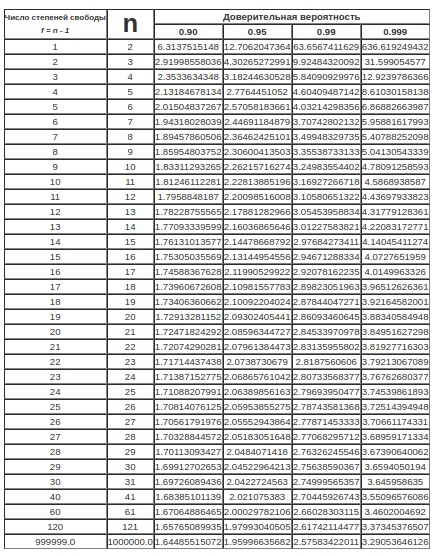

In [145]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

t-value = 0.7405483189915916, мы его сравниваем с табличным значением 2.00 (или число от 1.97 до 2, так как нет 96 в таблице) (alpha = 0.05, N=95). Так как значение t-value не превышает 1.97, то мы принимаем нулевую гипотезу (о том, что средние значения выборок равны). 

Либо можно оценивать p-value. Вероятность получить такое (либо большее) значение t при условии, что проверяемая нулевая гипотеза верна, оказалась прилична: p-value = 0.46  (во всяком случае, это больше 5%)

p-value равно 0.46, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между давлением женщин и генеральной совокупности в целом. 

Если мы построим график вероятности выборки и генеральной совокупности, то можно убедиться, что это действительно так.

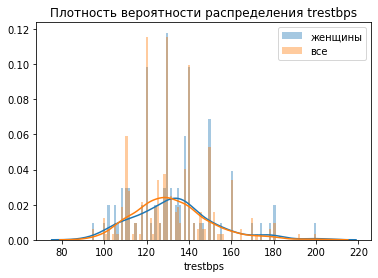

In [44]:
f_trestbps = data[data['sex']==0]['trestbps']
trestbps = data['trestbps']
sns.distplot(f_trestbps, 100)
sns.distplot(trestbps, 100)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'все'])
plt.show()

# Двухвыборочный t-критерий для независимых выборок

t-значение - это вероятность того, что различия между выборками также означают разные значения в выборках. Чем выше t, тем более различны группы между собой. Чем меньше t, тем более похожи группы и результаты повторятся.

$$t = \frac{\overline X_1 - \overline X_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

Сравним давление женщин и мужчин.

In [45]:
female_bps = data[data['sex']==0]['trestbps']

male_bps = data[data['sex']==1]['trestbps']

print(stats.ttest_ind(female_bps, male_bps))

Ttest_indResult(statistic=0.9864931536208362, pvalue=0.3246834797221042)


p-value равно 0.32, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между давлением женщин и мужчин в целом.

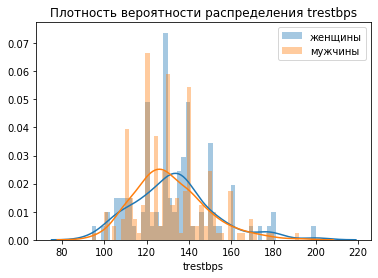

In [46]:
sns.distplot(female_bps, 50)
sns.distplot(male_bps, 50)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'мужчины'])
plt.show()

Сравним показатели давления больных и здоровых людей

In [47]:
healthy_bps = data[data['target']==0]['trestbps']

ill_bps = data[data['target']==1]['trestbps']

stats.ttest_ind(healthy_bps, ill_bps)

Ttest_indResult(statistic=2.5412927171039, pvalue=0.011546059200233312)

t-value равно 2,5 и p-value меньше 0.01, значит, группы статистически отличаются (понятно почему - у сердечников другие показатели давления)

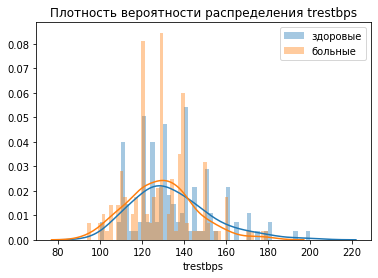

In [48]:
sns.distplot(healthy_bps, 50)
sns.distplot(ill_bps, 50)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['здоровые', 'больные'])
plt.show()

In [49]:
print(len(healthy_bps))
print(len(ill_bps))

138
165


Сравним две группы людей (больных и здоровых) по показателям **oldpeak** (тест, который указывает на высокую вероятность заболевания коронарной артерии, - это тест, в котором наблюдается значительная депрессия ST при низкой частоте работы, связанная с типичной стенообразной болью и снижением артериального давления). Так как здоровые показатели очевидно отличаются от больных, посмотрим статистические показатели.

In [56]:
healthy_oldpeak = data[data['target']==0]['oldpeak']

ill_oldpeak = data[data['target']==1]['oldpeak']

stats.ttest_ind(healthy_oldpeak, ill_oldpeak)

Ttest_indResult(statistic=8.279579663866224, pvalue=4.085346391354538e-15)

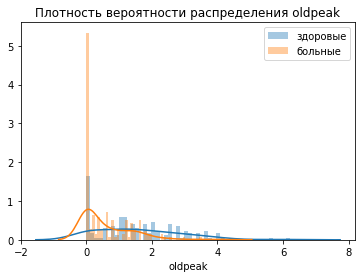

In [57]:
sns.distplot(healthy_oldpeak, 50)
sns.distplot(ill_oldpeak, 50)
plt.title('Плотность вероятности распределения oldpeak')
plt.legend(['здоровые', 'больные'])
plt.show()

Высокий показатель t-value=8.2 и низкий показатель p-value=0 говорит о том, что группы статистически значимы.

# Множественный тест (ANOVA)

Если мы хотим оценить не две группы, а три и более, нужно использовать множественное тестирование. 

Возьмем таблицу 3 группы из колонки restecg (resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)). Сравним их на наличие болезней

In [161]:
restecg_0 = data[data['restecg']==0]['target']

restecg_1 = data[data['restecg']==1]['target']

restecg_2 = data[data['restecg']==2]['target']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=5.131680093569876, pvalue=0.0064359766834508085)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным типом показателей ЭКГ.

# Другие методы тестирования

https://en.wikipedia.org/wiki/A/B_testing - примеры других критериев

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/